In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv('LoanStats3d.csv', skipinitialspace=True, header=1)

# Note the warning about dtypes.

C:\Users\rkies\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [4]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

## DRILL: Third Attempt

So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

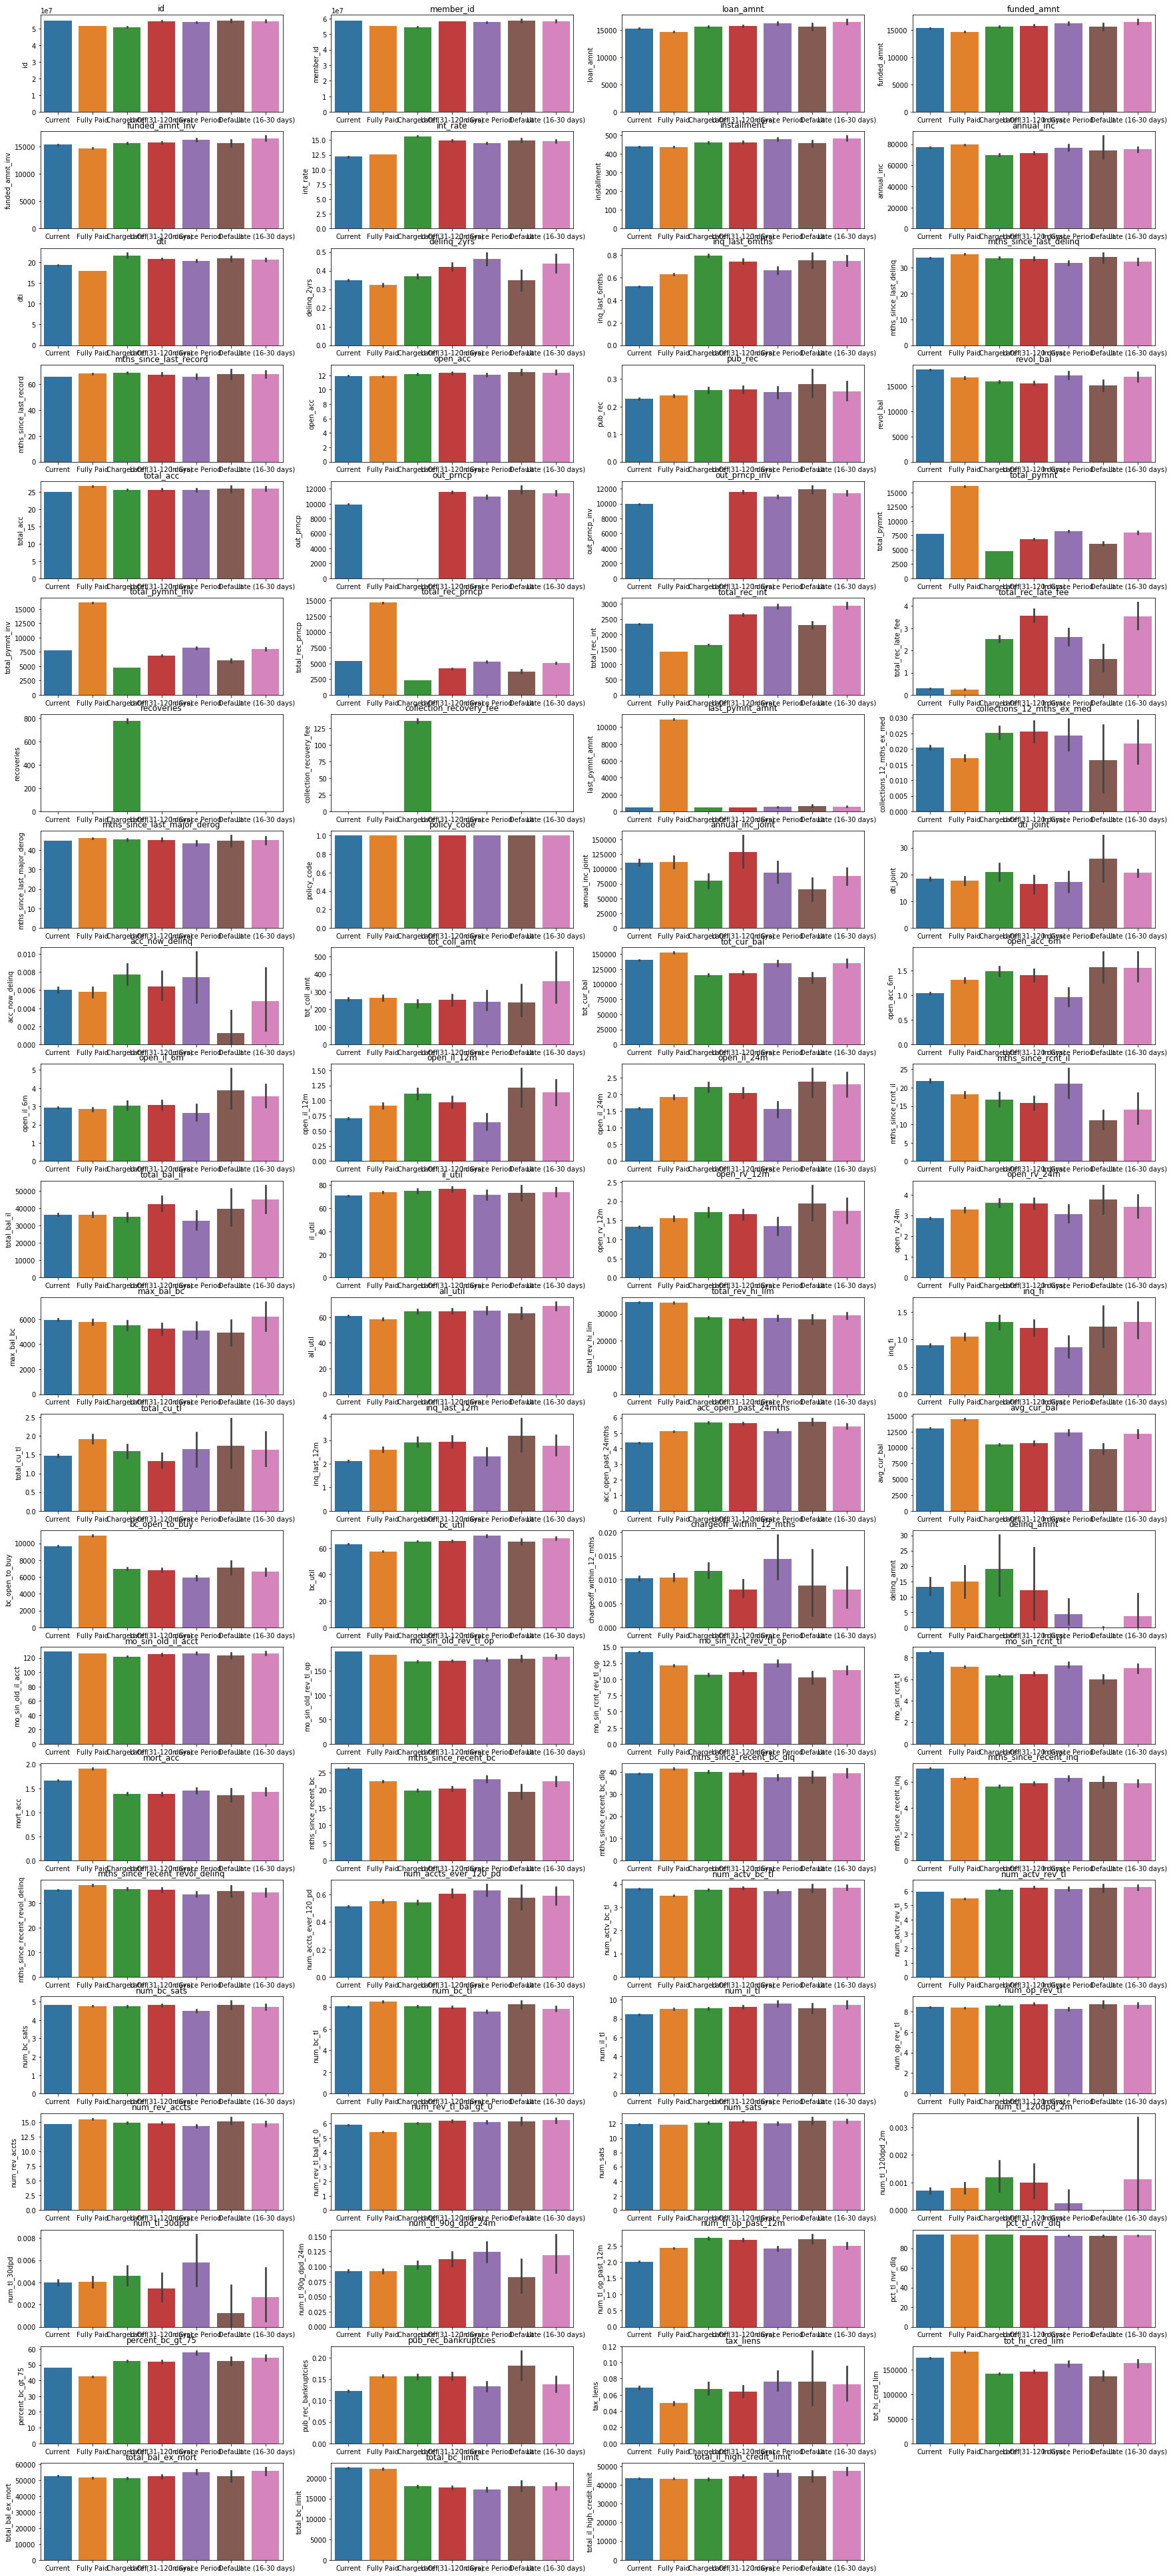

In [5]:
#plot of non-numerical variables
categories = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
             'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 
             'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
             'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 
              'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint',
             'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
             'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
             'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
             'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 
              'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
             'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
             'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
             'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
             'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort',
             'total_bc_limit', 'total_il_high_credit_limit']
plt.figure(figsize=(30,80))
for index, var in enumerate(categories):
    plt.subplot(25, 4, index+1)
    sns.barplot(y2015['loan_status'], y2015[var])
    plt.title(var)
    plt.xlabel('')

plt.show()

In [6]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop(['loan_status', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 
                'mths_since_last_record', 'open_acc', 'total_acc', 'mths_since_last_major_derog', 'policy_code',
               'il_util', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mths_since_recent_bc_dlq', 
                'mths_since_recent_revol_delinq', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_il_tl',
               'num_op_rev_tl', 'num_rev_accts', 'num_sats', 'pct_tl_nvr_dlq', 'total_il_high_credit_limit', 
                'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'int_rate', 'annual_inc', 
                'dti', 'mths_since_last_delinq', 'all_util','num_bc_tl', 'num_rev_tl_bal_gt_0', 'total_bal_ex_mort', 
                'revol_bal', 'max_bal_bc', 'total_rev_hi_lim', 'mths_since_recent_inq', 'num_accts_ever_120_pd',
               'num_tl_op_past_12m', 'percent_bc_gt_75', 'acc_open_past_24mths', 'collection_recovery_fee', 
                'mths_since_recent_bc', 'tot_cur_bal', 'pub_rec', 'inq_last_6mths', 'mo_sin_rcnt_rev_tl_op', 
                'mo_sin_rcnt_tl', 'tot_hi_cred_lim', 'total_bc_limit', 'open_rv_24m', 'avg_cur_bal', 'mort_acc', 
                'pub_rec_bankruptcies', 'tax_liens', 'delinq_2yrs', 'open_il_6m', 'total_bal_il', 'total_cu_tl', 
                'inq_last_12m', 'total_rec_prncp', 'open_acc_6m', 'open_rv_12m', 'inq_fi', 'collections_12_mths_ex_med',
               'total_rec_int', 'num_tl_90g_dpd_24m', 'open_il_24m', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 
                'open_il_12m', 'bc_open_to_buy', 'chargeoff_within_12_mths', 'delinq_amnt', 'num_tl_30dpd',
               'total_rec_late_fee', 'issue_d', 'pymnt_plan', 'purpose', 'title', 'initial_list_status',
               'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint', 'term', 'grade',
               'emp_length', 'home_ownership', 'verification_status'], 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

for col in X.columns:
    print(col)
cross_val_score(rfc, X, Y, cv=10)

recoveries
next_pymnt_d_Feb-2017
next_pymnt_d_Jan-2017
next_pymnt_d_Jul-2016
next_pymnt_d_Mar-2017


C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

array([0.90707891, 0.90983354, 0.9101185 , 0.91539028, 0.91802422,
       0.91935407, 0.9205633 , 0.92182194, 0.92319567, 0.9256163 ])

I was able to construct a model that only used the recoveries and next payment date columns and had more than 90% accuracy in a 10-fold cross validation. These variables do not have anything to do with payment amount or outstanding principal.